# GRADIENT DESCENT

## la fonction x²

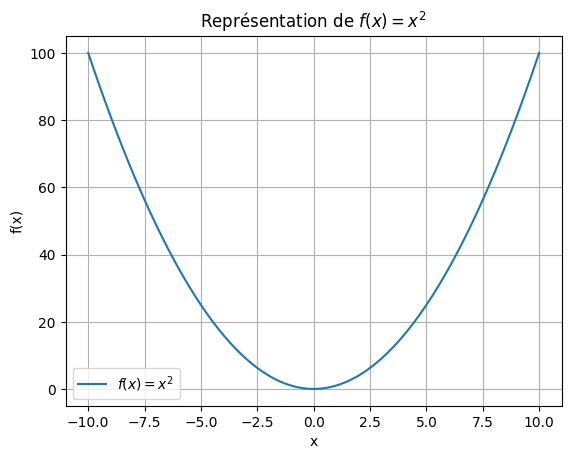

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

# On génère des valeurs de x
x = np.linspace(-10, 10, 400)

# calcul des images
y = f(x)

# Créer le graphique
plt.plot(x, y, label='$f(x) = x^2$')
plt.title('Représentation de $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Pente et tangente

In [142]:
def tx_accroissement(x, dx=1e-4, f=lambda x: x**2):
    return (f(x + dx) - f(x)) / dx

def tangente(x, a, dx=1e-4, f=lambda x: x**2):
    slant = tx_accroissement(a, dx, f)
    print(f"pente théorique : {slant}")
    return slant*(x-a) + f(a)

pente théorique : 4.0001000000078335


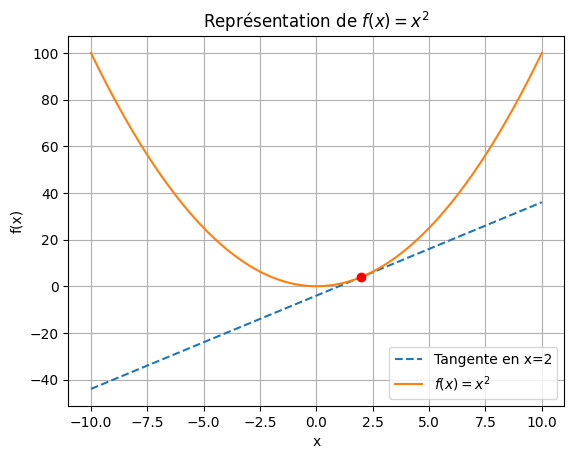

In [143]:
y_tangente = tangente(x, 2)
plt.plot(x, y_tangente, '--', label='Tangente en x=2')

plt.plot(x, y, label='$f(x) = x^2$')
plt.plot(2, f(2), 'ro')
plt.title('Représentation de $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Calcul de gradient

In [144]:
import numpy as np

def gradient_computation(f, a: np.ndarray, eps: float = 1e-4):
    n = len(a)
    grad_a = np.zeros(n)  # Plus efficace que np.append

    for i in range(n):
        a_eps = a.copy()  # Crée une copie indépendante
        a_eps[i] += eps   # Modifie la i-ème composante
        partial_derivative = (f(a_eps) - f(a)) / eps
        grad_a[i] = partial_derivative
    return grad_a

        


def rosenbrock(a):
    x, y = a[0], a[1]
    return (1 - x)**2 + 100 * (y - x**2)**2

# Test du gradient en [1, 1]
def rosenbrock_derivee(a):
    x, y = a[0], a[1]
    dx = -2*(1-x) -400*x*(y-x**2)
    dy = 200*(y-x**2)
    return [dx, dy]

def nouveau_point(f, a_k:np.array, delta: float, eps: float = 1e-4):
    grad_a_k = gradient_computation(f, a_k, eps)
    new_point = a_k - delta*grad_a_k
    return(new_point)

print(gradient_computation(rosenbrock, np.array([1.,2.])))
print(rosenbrock_derivee(np.array([1.,2.])))


[-399.979896  200.01    ]
[np.float64(-400.0), np.float64(200.0)]


C:\Users\trema\AppData\Local\Temp\ipykernel_20772\1755660654.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad_a[i] = partial_derivative


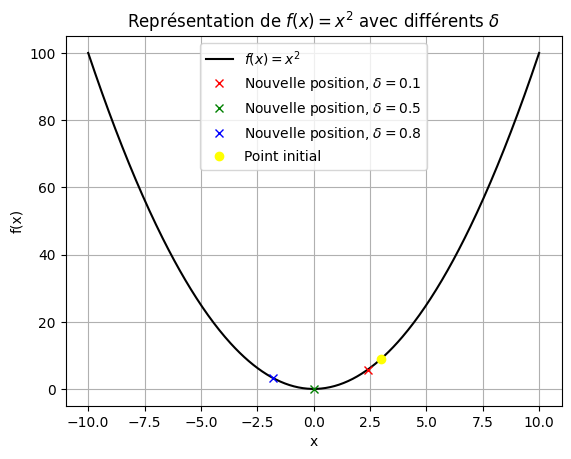

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.array(x)**2

# Configuration des deltas et des couleurs
deltas = [0.1, 0.5, 0.8]
colors = ['red', 'green', 'blue']

# Valeurs pour le tracé
x = np.linspace(-10, 10, 400)
y = f(x)

a_k = np.array([3.0])

plt.plot(x, y, label='$f(x) = x^2$', color='black')

# Tracer les nouveaux points pour chaque delta
for i, delta in enumerate(deltas):
    new_point = nouveau_point(f, a_k, delta)
    plt.plot(new_point[0], f(new_point[0]), 'x', color=colors[i], label=f'Nouvelle position, $\delta={delta}$')

plt.plot(a_k[0], f(a_k[0]), 'o', color='yellow', label='Point initial')

plt.title('Représentation de $f(x) = x^2$ avec différents $\delta$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Implémentation de la descente de gradient

In [146]:
import numpy as np

def random_point(intervals):
    return np.array([np.random.uniform(low, high) for low, high in intervals])


def gradient_descent(f, intervals: np.array, starting_point: np.array = None,
                     initial_learning_rate: float = 0.4, desc: str = 'constant',
                     max_it: int = 100, max_ecart: float = 1e-4, eps: float = 1e-4,
                     bounded: bool = True):
    
    # Point initial choisi au hasard
    historique = dict()
    historique['x'] = np.zeros((max_it, len(intervals)))
    historique['grad_x'] = np.zeros((max_it, len(intervals)))
    historique['ecart']=np.zeros(max_it)
    if starting_point is None:
        point = random_point(intervals)
    else:
        point = starting_point

    for k in range(max_it):
        grad_point = gradient_computation(f, point, eps)
        ecart = np.linalg.norm(grad_point)

        historique['x'][k]=point
        historique['grad_x'][k]=grad_point
        historique['ecart'][k]=ecart

        if ecart < max_ecart:
            return point, "gradient proche de 0", k+1, historique
        
        if desc == 'linear':
            learning_rate = initial_learning_rate / (k + 1)
        elif desc == 'quad':
            learning_rate = initial_learning_rate / (k + 1) ** 2
        elif desc == 'exp':
            learning_rate = initial_learning_rate * np.exp(-k)
        else:
            learning_rate = initial_learning_rate
        
        point = point - learning_rate*grad_point
        if bounded:
            for i in range(len(point)):
                inf, sup = intervals[i]
                if point[i]<inf:
                    point[i] = inf
                if point[i]>sup:
                    point[i] = sup

    return point, "max itérations atteint", max_it, historique

def gradient_descent_multistart(f, intervals: np.array, n_start: int = 10,
                                initial_learning_rate: float = 0.8, desc: str = 'constant',
                                max_it: int = 100, max_ecart: float = 1e-4, eps: float = 1e-4,
                                bounded: bool = True):
    
    point_min = None
    f_min = np.inf
    for _ in range(n_start):
        starting_point = random_point(intervals)
        point, _, _, _ = gradient_descent(f, intervals, starting_point, initial_learning_rate, desc, max_it, max_ecart, eps, bounded)
        if f(point) < f_min:
            point_min = point
            f_min = f(point_min)
    
    return point_min

### Un exemple avec x²

In [147]:
import numpy as np

# Fonction x^2
def quadratic(a):
    return a[0]**2

# Intervalle de recherche pour x
intervals = np.array([[-10, 10]])  # Recherche sur l'intervalle [-10, 10]


# Test avec un seul départ aléatoire
point, message, nb_iterations, hist = gradient_descent(quadratic, intervals= intervals, initial_learning_rate=0.3, desc='constant', max_it=10)
print("Résultat descente de gradient :")
print("Point:", point)
print("Valeur de la fonction:", quadratic(point))
print("Message d'arrêt:", message)
print(nb_iterations)

# Test avec plusieurs départs aléatoires
point_min = gradient_descent_multistart(quadratic, intervals, n_start=5, initial_learning_rate=0.5, desc='linear')
print("\nRésultat descente de gradient multi-start :")
print("Point:", point_min)
print("Valeur de la fonction:", quadratic(point_min))


Résultat descente de gradient :
Point: [-0.00041694]
Valeur de la fonction: 1.7384223864889105e-07
Message d'arrêt: max itérations atteint
10

Résultat descente de gradient multi-start :
Point: [-4.99999523e-05]
Valeur de la fonction: 2.4999952281632464e-09


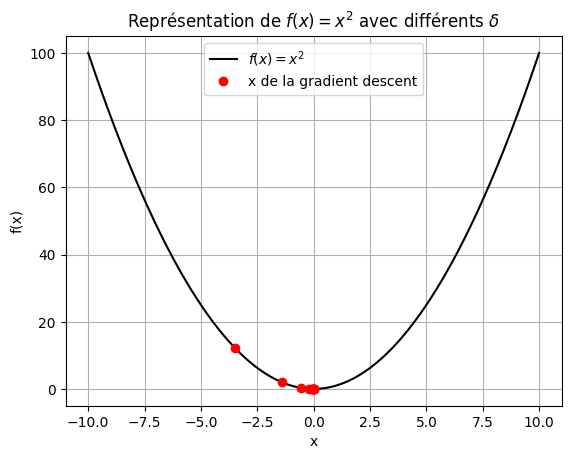

[[-6.99889998e+00]
 [-2.79955999e+00]
 [-1.11982400e+00]
 [-4.47929599e-01]
 [-1.79171840e-01]
 [-7.16687358e-02]
 [-2.86674943e-02]
 [-1.14669977e-02]
 [-4.58679909e-03]
 [-1.83471964e-03]]


In [148]:
# Valeurs pour le tracé
x = np.linspace(-10, 10, 400)
y = x**2
hist_x = hist['x']
x_grad = np.array([float(elt[0]) for elt in hist_x])
y_grad = x_grad**2
plt.plot(x, y, label='$f(x) = x^2$', color='black')
plt.plot(x_grad, y_grad, 'ro', label = "x de la gradient descent")




# plt.plot(a_k[0], f(a_k[0]), 'o', color='yellow', label='Point initial')

plt.title('Représentation de $f(x) = x^2$ avec différents $\delta$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(hist['grad_x'])

### Un exemple en 2D

In [149]:
def rosenbrock(a):
    x, y = a[0], a[1]
    return (1 - x)**2 + 100 * (y - x**2)**2


# Intervalle de recherche pour x
intervals = np.array([[-2, 2], [-1,3]])  # Recherche sur l'intervalle [-10, 10]


# Test avec un seul départ aléatoire
point, message, nb_iterations, hist = gradient_descent(rosenbrock, intervals, initial_learning_rate=0.001, desc='linear', max_it=100000)
print("Résultat descente de gradient :")
print("Point:", point)
print("Valeur de la fonction:", quadratic(point))
print("Message d'arrêt:", message)
print(nb_iterations)
print("~"*20)

point_min = gradient_descent_multistart(rosenbrock, intervals, n_start=20, initial_learning_rate=0.001, desc='linear', max_it=100000)
print("\nRésultat descente de gradient multi-start :")
print("Point:", point_min)
print("Valeur de la fonction:", quadratic(point_min))



Résultat descente de gradient :
Point: [-0.29020877  0.07914912]
Valeur de la fonction: 0.0842211294509686
Message d'arrêt: max itérations atteint
100000
~~~~~~~~~~~~~~~~~~~~

Résultat descente de gradient multi-start :
Point: [1.02080842 1.04226008]
Valeur de la fonction: 1.0420498375395166


## Régression linéaire

On cherche $a$ et $b$ qui minimisent l'erreur quadratique suivante :
$$
\arg \min_{a,b} \left( \sum_{i=1}^{n} \left( y_i - (a x_i + b) \right)^2 \right)
$$


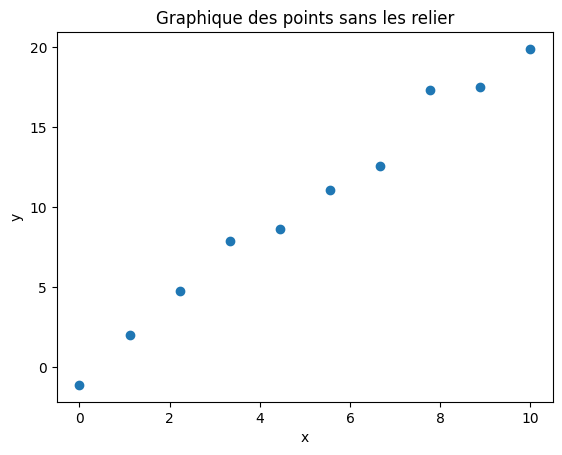

In [150]:
# vrais params
a = 2  
sigma = 1  
n = 10
b = 5
# Génération des valeurs x et y
x = np.linspace(0, 10, n)
eps = np.random.normal(0, sigma, n)
y = a * x + eps


plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des points sans les relier')
plt.show()

In [151]:
# On définit la fonction de coût
def cout(X:np.array):
    a, b = X
    c = (y - a*x - b)**2
    return c.mean()

In [152]:
# Intervalle de recherche pour x
a = 2  
sigma = 1  
n = 5
b = 5
intervals = np.array([[0, 5], [0,10]]) 


point, message, nb_iterations, hist = gradient_descent(cout, intervals, initial_learning_rate=0.001
                                                       , desc='linear', max_it=100, bounded=False)
print(point)
point_multistar = gradient_descent_multistart(cout, intervals, n_start=30, initial_learning_rate=0.001, desc='linear', max_it=100, bounded=False)
print(point_multistar)
cout(point_multistar)< cout(point)

[0.81643857 5.34939614]
[1.52188961 1.3287179 ]


np.True_

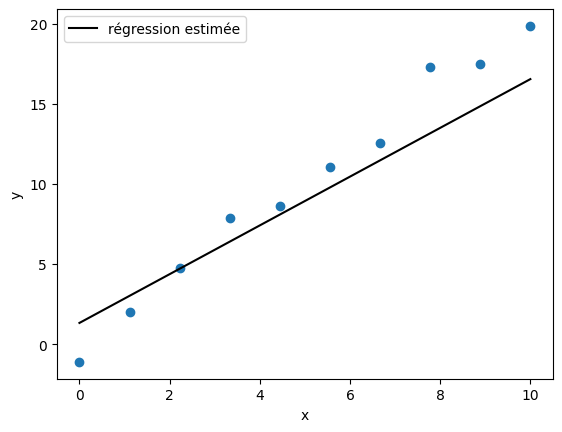

In [153]:
a_est = point_multistar[0]
b_est = point_multistar[1]
x_plot = np.linspace(0, 10, 100)
y_plot = a_est * x_plot + b_est
plt.scatter(x, y)
plt.plot(x_plot, y_plot, label='régression estimée', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()